In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

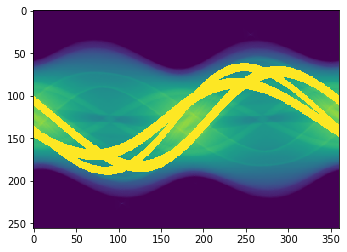

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(90-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [9]:
k = 0

for i in range(256-window_size):
    for j in range(90-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(15176, 3, 3, 1)
(15176, 1)
Epoch 1/1000
475/475 [==============================] - 1s 2ms/step - loss: 4.1650 - accuracy: 0.3110
Epoch 2/1000
475/475 [==============================] - 1s 2ms/step - loss: 3.5200 - accuracy: 0.3189
Epoch 3/1000
475/475 [==============================] - 1s 2ms/step - loss: 3.3326 - accuracy: 0.3221
Epoch 4/1000
475/475 [==============================] - 1s 2ms/step - loss: 3.1097 - accuracy: 0.3311
Epoch 5/1000
475/475 [==============================] - 1s 2ms/step - loss: 2.8625 - accuracy: 0.3348
Epoch 6/1000
475/475 [==============================] - 1s 2ms/step - loss: 2.7357 - accuracy: 0.3414
Epoch 7/1000
475/475 [==============================] - 1s 2ms/step - loss: 2.6427 - accuracy: 0.3448
Epoch 8/1000
475/475 [==============================] - 1s 2ms/step - loss: 2.5566 - accuracy: 0.3507
Epoch 9/1000
475/475 [==============================] - 1s 2ms/step - loss: 2.4909 - accuracy: 0.3514
Epoch 10/1000
475/475 [==============================]

475/475 [==============================] - 1s 2ms/step - loss: 1.8000 - accuracy: 0.4162
Epoch 81/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7729 - accuracy: 0.4191
Epoch 82/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7948 - accuracy: 0.4215
Epoch 83/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7841 - accuracy: 0.4180
Epoch 84/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7822 - accuracy: 0.4190
Epoch 85/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7801 - accuracy: 0.4191
Epoch 86/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7650 - accuracy: 0.4184
Epoch 87/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7764 - accuracy: 0.4164
Epoch 88/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7909 - accuracy: 0.4170
Epoch 89/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.7623 - a

475/475 [==============================] - 1s 2ms/step - loss: 1.6038 - accuracy: 0.4522
Epoch 160/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6218 - accuracy: 0.4485
Epoch 161/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6087 - accuracy: 0.4512
Epoch 162/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6221 - accuracy: 0.4449
Epoch 163/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6061 - accuracy: 0.4499
Epoch 164/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6149 - accuracy: 0.4500
Epoch 165/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6078 - accuracy: 0.4483
Epoch 166/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6153 - accuracy: 0.4501
Epoch 167/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.6013 - accuracy: 0.4489
Epoch 168/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.5252 - accuracy: 0.4671
Epoch 238/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5224 - accuracy: 0.4689
Epoch 239/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5077 - accuracy: 0.4678
Epoch 240/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5279 - accuracy: 0.4645
Epoch 241/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5104 - accuracy: 0.4656
Epoch 242/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5230 - accuracy: 0.4671
Epoch 243/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5157 - accuracy: 0.4696
Epoch 244/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5074 - accuracy: 0.4702
Epoch 245/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5175 - accuracy: 0.4630
Epoch 246/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.5341 - accuracy: 0.4674
Epoch 316/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5111 - accuracy: 0.4702
Epoch 317/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5064 - accuracy: 0.4732
Epoch 318/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5026 - accuracy: 0.4719
Epoch 319/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5003 - accuracy: 0.4793
Epoch 320/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.5204 - accuracy: 0.4681
Epoch 321/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4934 - accuracy: 0.4749
Epoch 322/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4821 - accuracy: 0.4795
Epoch 323/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4819 - accuracy: 0.4784
Epoch 324/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.4332 - accuracy: 0.4897
Epoch 394/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4295 - accuracy: 0.4910
Epoch 395/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4260 - accuracy: 0.4899
Epoch 396/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4153 - accuracy: 0.4951
Epoch 397/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4103 - accuracy: 0.4945
Epoch 398/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4173 - accuracy: 0.4931
Epoch 399/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4229 - accuracy: 0.4924
Epoch 400/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4326 - accuracy: 0.4910
Epoch 401/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4277 - accuracy: 0.4949
Epoch 402/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.3843 - accuracy: 0.5049
Epoch 472/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3935 - accuracy: 0.4959
Epoch 473/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3805 - accuracy: 0.5055
Epoch 474/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3921 - accuracy: 0.5015
Epoch 475/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3892 - accuracy: 0.4987
Epoch 476/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4099 - accuracy: 0.4953
Epoch 477/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3917 - accuracy: 0.4997
Epoch 478/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3796 - accuracy: 0.4999
Epoch 479/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3761 - accuracy: 0.5044
Epoch 480/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.3651 - accuracy: 0.5052
Epoch 550/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3775 - accuracy: 0.5080
Epoch 551/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3513 - accuracy: 0.5123
Epoch 552/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3607 - accuracy: 0.5044
Epoch 553/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3576 - accuracy: 0.5099
Epoch 554/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3564 - accuracy: 0.5130
Epoch 555/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3525 - accuracy: 0.5078: 0s
Epoch 556/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3499 - accuracy: 0.5154
Epoch 557/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3701 - accuracy: 0.5037
Epoch 558/1000
475/475 [==============================] - 1s 2ms/step - los

475/475 [==============================] - 1s 2ms/step - loss: 1.3428 - accuracy: 0.5115
Epoch 628/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3455 - accuracy: 0.5184
Epoch 629/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3334 - accuracy: 0.5208
Epoch 630/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3526 - accuracy: 0.5142
Epoch 631/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3328 - accuracy: 0.5173
Epoch 632/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3282 - accuracy: 0.5204
Epoch 633/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3344 - accuracy: 0.5164
Epoch 634/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3320 - accuracy: 0.5154
Epoch 635/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3284 - accuracy: 0.5185
Epoch 636/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.3300 - accuracy: 0.5188
Epoch 706/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3286 - accuracy: 0.5178
Epoch 707/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3052 - accuracy: 0.5248
Epoch 708/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3123 - accuracy: 0.5217
Epoch 709/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3210 - accuracy: 0.5213
Epoch 710/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3149 - accuracy: 0.5241
Epoch 711/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3087 - accuracy: 0.5214
Epoch 712/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3443 - accuracy: 0.5150
Epoch 713/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3106 - accuracy: 0.5245
Epoch 714/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.3003 - accuracy: 0.5250
Epoch 784/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3078 - accuracy: 0.5241
Epoch 785/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2938 - accuracy: 0.5316
Epoch 786/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.3123 - accuracy: 0.5223
Epoch 787/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2931 - accuracy: 0.5240
Epoch 788/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2947 - accuracy: 0.5233
Epoch 789/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2979 - accuracy: 0.5266
Epoch 790/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2919 - accuracy: 0.5308
Epoch 791/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2965 - accuracy: 0.5267
Epoch 792/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2750 - accuracy: 0.5332
Epoch 862/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2897 - accuracy: 0.5293
Epoch 863/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2854 - accuracy: 0.5329
Epoch 864/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2769 - accuracy: 0.5345
Epoch 865/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2723 - accuracy: 0.5325
Epoch 866/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2659 - accuracy: 0.5341
Epoch 867/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2763 - accuracy: 0.5333
Epoch 868/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2844 - accuracy: 0.5314
Epoch 869/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2787 - accuracy: 0.5311
Epoch 870/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.2575 - accuracy: 0.5364
Epoch 940/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2755 - accuracy: 0.5339
Epoch 941/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2620 - accuracy: 0.5376
Epoch 942/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2549 - accuracy: 0.5366
Epoch 943/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2630 - accuracy: 0.5385
Epoch 944/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2656 - accuracy: 0.5344
Epoch 945/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2676 - accuracy: 0.5366
Epoch 946/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2565 - accuracy: 0.5390
Epoch 947/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.2688 - accuracy: 0.5358
Epoch 948/1000
475/475 [==============================] - 1s 2ms/step - loss: 1

In [10]:
for i in range(256-window_size):
    for j in range(90-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

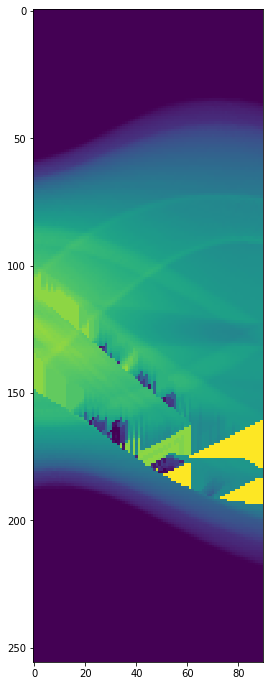

In [11]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:90])
plt.colorbar

In [12]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [13]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)